In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear,relu,sigmoid

In [3]:
def load_data():
    X=np.load("data/X.npy")
    Y=np.load("data/y.npy")
    return X,Y

In [4]:
x,y=load_data()

In [5]:
print("First Elment of X is ",x[0])

First Elment of X is  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0

In [6]:
print("printing y :",y)

printing y : [[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]


In [7]:
print("shape of x: ",x.shape)

print("shape of y is ",y.shape)

shape of x:  (5000, 400)
shape of y is  (5000, 1)


it means it has 400 feature and 5000 sample data of handwritten digits 

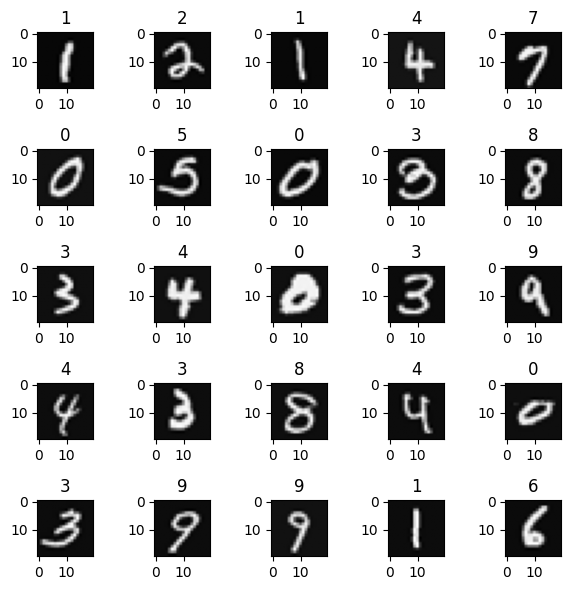

In [8]:


idx = np.random.randint(0, x.shape[0], 25)
plt.figure(figsize=(6,6))

for i, index in enumerate(idx):
   
    img = x[index].reshape(20, 20).T
    label = y[index, 0]
    
    plt.subplot(5, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(str(label))
   

plt.tight_layout()
plt.show()


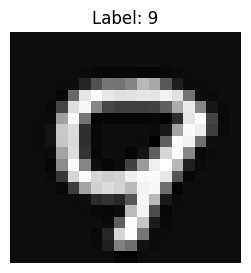

In [9]:
def show_digit(index):
    img = x[index].reshape(20, 20).T   
    plt.figure(figsize=(5,3))
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {y[index, 0]}")
    plt.axis("off")
    plt.show()


#digit at any index (5000 sample data)
show_digit(4999)


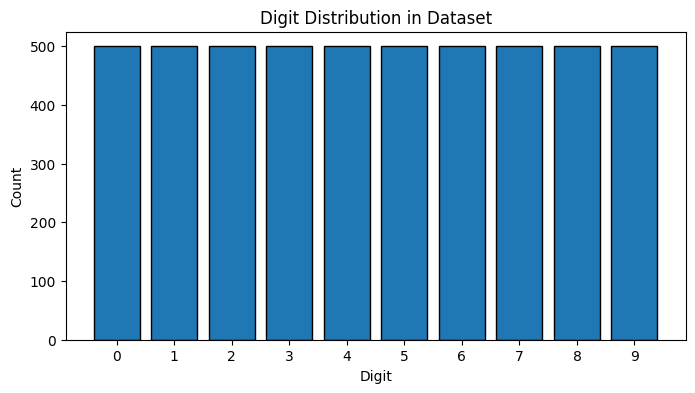

In [10]:
plt.figure(figsize=(8,4))
plt.hist(y.flatten(), bins=np.arange(11)-0.5, edgecolor="black", rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Digit Distribution in Dataset")
plt.show()

Equal distribution of data.>>

## using Neural Network Layer:
layer 1: 25 units shape of w1(400,25)  b1(25,)

layer 2: 15 units shape of w2(25,15) b2(15,)

layer 3: 10 units w3(15,10) and b3(10,)

In [11]:
tf.random.set_seed(1234)
model=Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25,activation='relu',name='layer1'),
        Dense(15,activation='relu',name='layer2'),
        Dense(10,activation='linear',name='layer3')
    ],name="my_model"
)

In [12]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
[layer1, layer2, layer3] = model.layers

In [14]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    x, y,
    epochs=40,
    batch_size=32,      
    validation_split=0.2,   
    shuffle=True,           
    verbose=1
)

Epoch 1/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5265 - loss: 1.5186 - val_accuracy: 0.0000e+00 - val_loss: 7.2897
Epoch 2/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8815 - loss: 0.4683 - val_accuracy: 0.0000e+00 - val_loss: 10.3423
Epoch 3/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9225 - loss: 0.2872 - val_accuracy: 0.0000e+00 - val_loss: 11.9006
Epoch 4/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9367 - loss: 0.2263 - val_accuracy: 0.0000e+00 - val_loss: 12.8610
Epoch 5/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9463 - loss: 0.1918 - val_accuracy: 0.0000e+00 - val_loss: 13.5488
Epoch 6/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9525 - loss: 0.1677 - val_accuracy: 0.0000e+00 - val_loss: 14.0971
Epoch 7/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9572 - loss: 0.1489 - val_accuracy: 0.0000e+00 - val_loss: 14.5604
Epoch 8/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650

## Loss Function Visulization

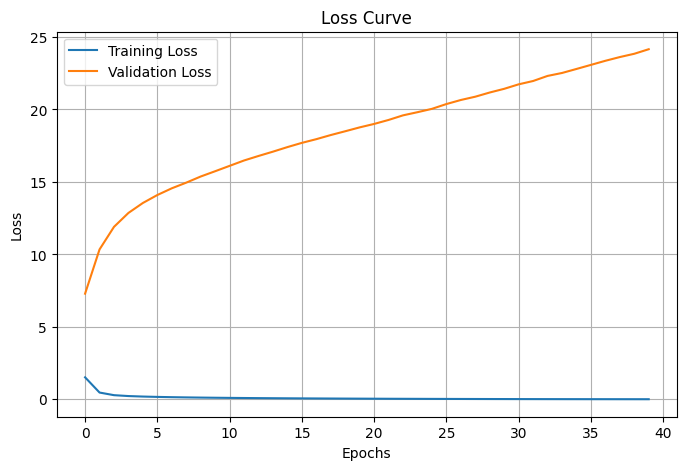

In [16]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()


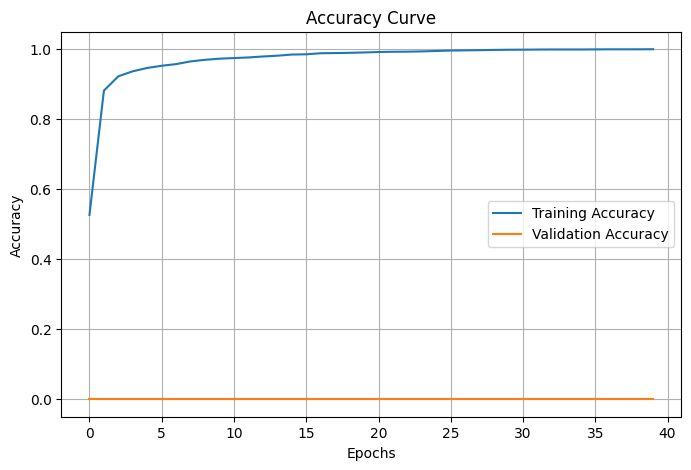

In [17]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()

## let see some random prediction;


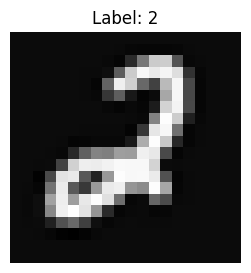

In [18]:

show_digit(1022)


In [19]:
prediction=model.predict(x[1022].reshape(1,400))

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
 predicting a Two: 
[[ -2.7429628  -7.1658673  16.637901    8.045746   -4.018815   -5.0026565
   -7.2464404  -8.232252  -17.584286  -15.784608 ]]
 Largest Prediction index: 2


In [20]:
prediction_p = tf.nn.softmax(prediction)
print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[3.8275201e-09 4.5927654e-11 9.9981445e-01 1.8552129e-04 1.0686165e-09
  3.9952538e-10 4.2372241e-11 1.5810625e-11 1.3721844e-15 8.2985647e-15]]
Total of predictions: 1.000


In [21]:
logits = model.predict(x)

# Convert logits -> predicted classes
y_pred = np.argmax(logits, axis=1)

# Flatten actual labels
y_true = y.flatten()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step


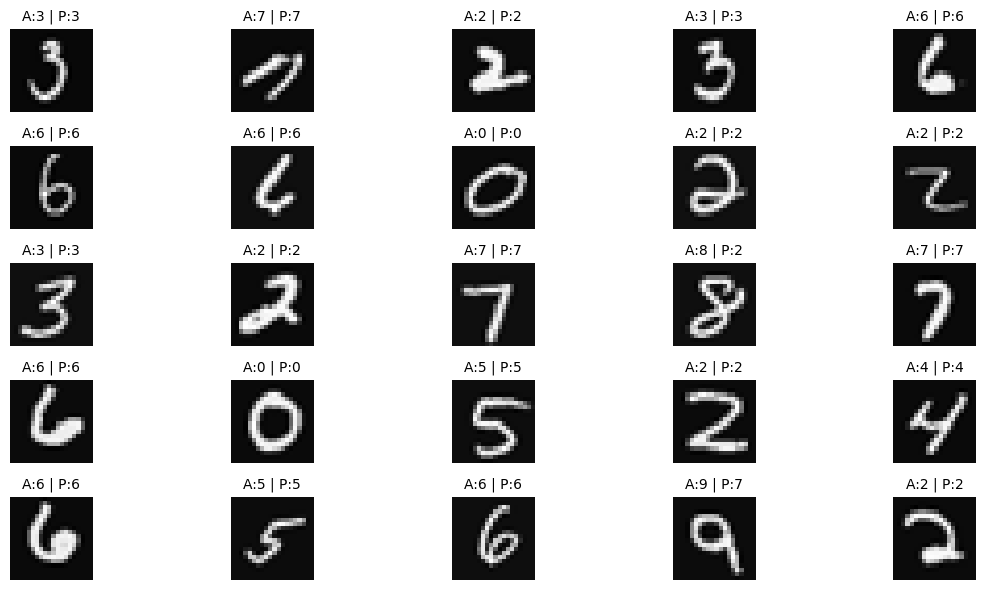

In [22]:
idx = np.random.randint(0, x.shape[0], 25)
plt.figure(figsize=(12,6))

for i, index in enumerate(idx):
    img = x[index].reshape(20, 20).T   # fix orientation
    actual = y_true[index]
    pred = y_pred[index]
    
    
    plt.subplot(5, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"A:{actual} | P:{pred}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [23]:
accuracy = np.mean(y_true == y_pred)
print(f"Overall Accuracy: {accuracy*100:.2f}%")


Overall Accuracy: 79.82%
